## Generate image montage per top feature

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(RColorBrewer))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”


## Define load image function

Referenced from [pyroptosis_signature_data_analysis repo](https://github.com/WayScience/pyroptosis_signature_data_analysis/blob/main/figures/3.figure3/notebooks/3.assemble_montage.ipynb).

In [2]:
load_image <- function(path){
    img <- png::readPNG(path)
    # Convert the image to a raster object
    g <- grid::rasterGrob(img, interpolate=TRUE)

    # Create a ggplot
    p <- ggplot() +
    annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void()
    return(p)
}

In [3]:
# Directory with single-cell crops
sc_crop_dir <- "./sc_crops"

# Path to each composite image (min or max) per top feature
max_int_feat1 <- file.path(sc_crop_dir, "max_int_feature_1", "max_int_feature_1_composite_cropped.png")
max_int_feat2 <- file.path(sc_crop_dir, "max_int_feature_2", "max_int_feature_2_composite_cropped.png")
max_int_feat3 <- file.path(sc_crop_dir, "max_int_feature_3", "max_int_feature_3_composite_cropped.png")
min_int_feat1 <- file.path(sc_crop_dir, "min_int_feature_1", "min_int_feature_1_composite_cropped.png")
min_int_feat2 <- file.path(sc_crop_dir, "min_int_feature_2", "min_int_feature_2_composite_cropped.png")
min_int_feat3 <- file.path(sc_crop_dir, "min_int_feature_3", "min_int_feature_3_composite_cropped.png")

max_radial_feat1 <- file.path(sc_crop_dir, "max_radial_feature_1", "max_radial_feature_1_composite_cropped.png")
max_radial_feat2 <- file.path(sc_crop_dir, "max_radial_feature_2", "max_radial_feature_2_composite_cropped.png")
max_radial_feat3 <- file.path(sc_crop_dir, "max_radial_feature_3", "max_radial_feature_3_composite_cropped.png")
min_radial_feat1 <- file.path(sc_crop_dir, "min_radial_feature_1", "min_radial_feature_1_composite_cropped.png")
min_radial_feat2 <- file.path(sc_crop_dir, "min_radial_feature_2", "min_radial_feature_2_composite_cropped.png")
min_radial_feat3 <- file.path(sc_crop_dir, "min_radial_feature_3", "min_radial_feature_3_composite_cropped.png")

In [4]:
# load top int feat images 
max_int_feat1_image <- load_image(max_int_feat1)
max_int_feat2_image <- load_image(max_int_feat2)
max_int_feat3_image <- load_image(max_int_feat3)
min_int_feat1_image <- load_image(min_int_feat1)
min_int_feat2_image <- load_image(min_int_feat2)
min_int_feat3_image <- load_image(min_int_feat3)

# load top radial feat images 
max_radial_feat1_image <- load_image(max_radial_feat1)
max_radial_feat2_image <- load_image(max_radial_feat2)
max_radial_feat3_image <- load_image(max_radial_feat3)
min_radial_feat1_image <- load_image(min_radial_feat1)
min_radial_feat2_image <- load_image(min_radial_feat2)
min_radial_feat3_image <- load_image(min_radial_feat3)


# Create list of images
list_of_images <- list(
    max_int_feat1_image,
    max_int_feat2_image,
    max_int_feat3_image,
    min_int_feat1_image,
    min_int_feat2_image,
    min_int_feat3_image,

    max_radial_feat1_image,
    max_radial_feat2_image,
    max_radial_feat3_image,
    min_radial_feat1_image,
    min_radial_feat2_image,
    min_radial_feat3_image
)

In [5]:
width <- 2.5
height <- 2.5

text_size <- 8

options(repr.plot.width = width, repr.plot.height = height)

# blank
blank <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = ""), size = text_size) 
    + theme_void()
)

# ggplot of just text for labelling min versus max cells (Null is always the max and WT is the min)
WT_min_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Minimum values\n(WT cells)"), size = text_size) 
    + theme_void()
)
Null_max_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Maximum values\n(Null cells)"), size = text_size) 
    + theme_void()
)

In [6]:
# patchwork the cropped single-cell images together
width <- 17
height <- 8

options(repr.plot.width = width, repr.plot.height = height)

# stich the images together for each genotype
max_int_feat_images <- (
    Null_max_text
    + list_of_images[[1]]
    + list_of_images[[2]]
    + list_of_images[[3]]
    + plot_layout(nrow = 1)
)
min_int_feat_images <- (
    WT_min_text
    + list_of_images[[4]]
    + list_of_images[[5]]
    + list_of_images[[6]]
    + plot_layout(nrow = 1)
)
max_radial_feat_images <- (
    Null_max_text
    + list_of_images[[7]]
    + list_of_images[[8]]
    + list_of_images[[9]]
    + plot_layout(nrow = 1)
)
min_radial_feat_images <- (
    WT_min_text
    + list_of_images[[10]]
    + list_of_images[[11]]
    + list_of_images[[12]]
    + plot_layout(nrow = 1)
)

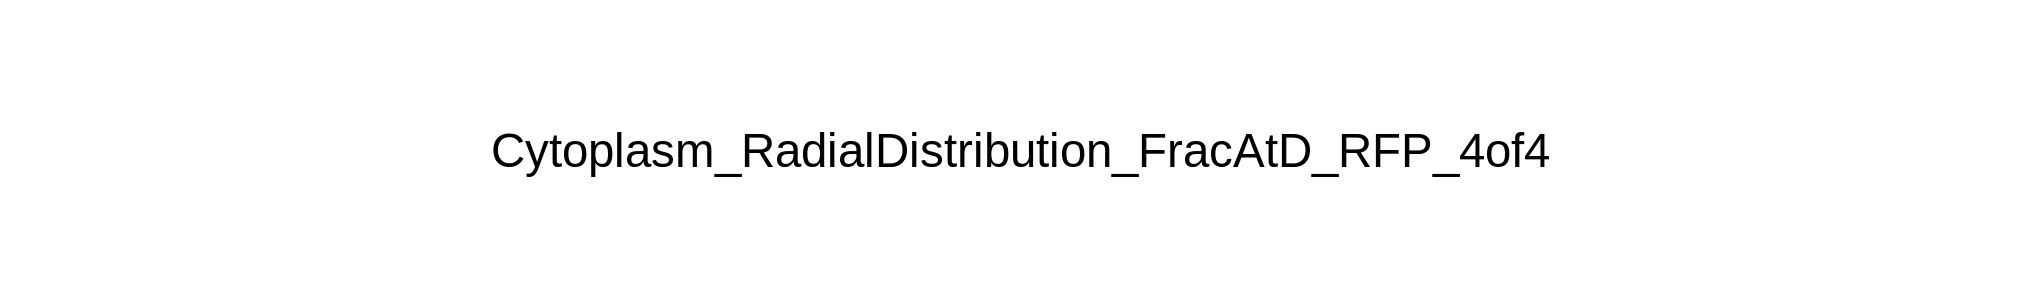

In [7]:
# Generate labels for each plot with CellProfiler feature
width <- 2.5
height <- 2.5

text_size <- 10

options(repr.plot.width = width, repr.plot.height = height)

# ggplot of just text
radial_feat_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Cytoplasm_RadialDistribution_FracAtD_RFP_4of4"), size = text_size) 
    + theme_void()
)
int_feat_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Cytoplasm_Intensity_MeanIntensityEdge_GFP"), size = text_size) 
    + theme_void()
)

# patch feature texts together
int_patch_text <- (
    int_feat_text
    + plot_layout(nrow = 1)
)

radial_patch_text <- (
    radial_feat_text
    + plot_layout(nrow = 1)
)

width <- 17
height <- 2.5

options(repr.plot.width = width, repr.plot.height = height)


radial_patch_text

## Generate top radial distribution feature image montage

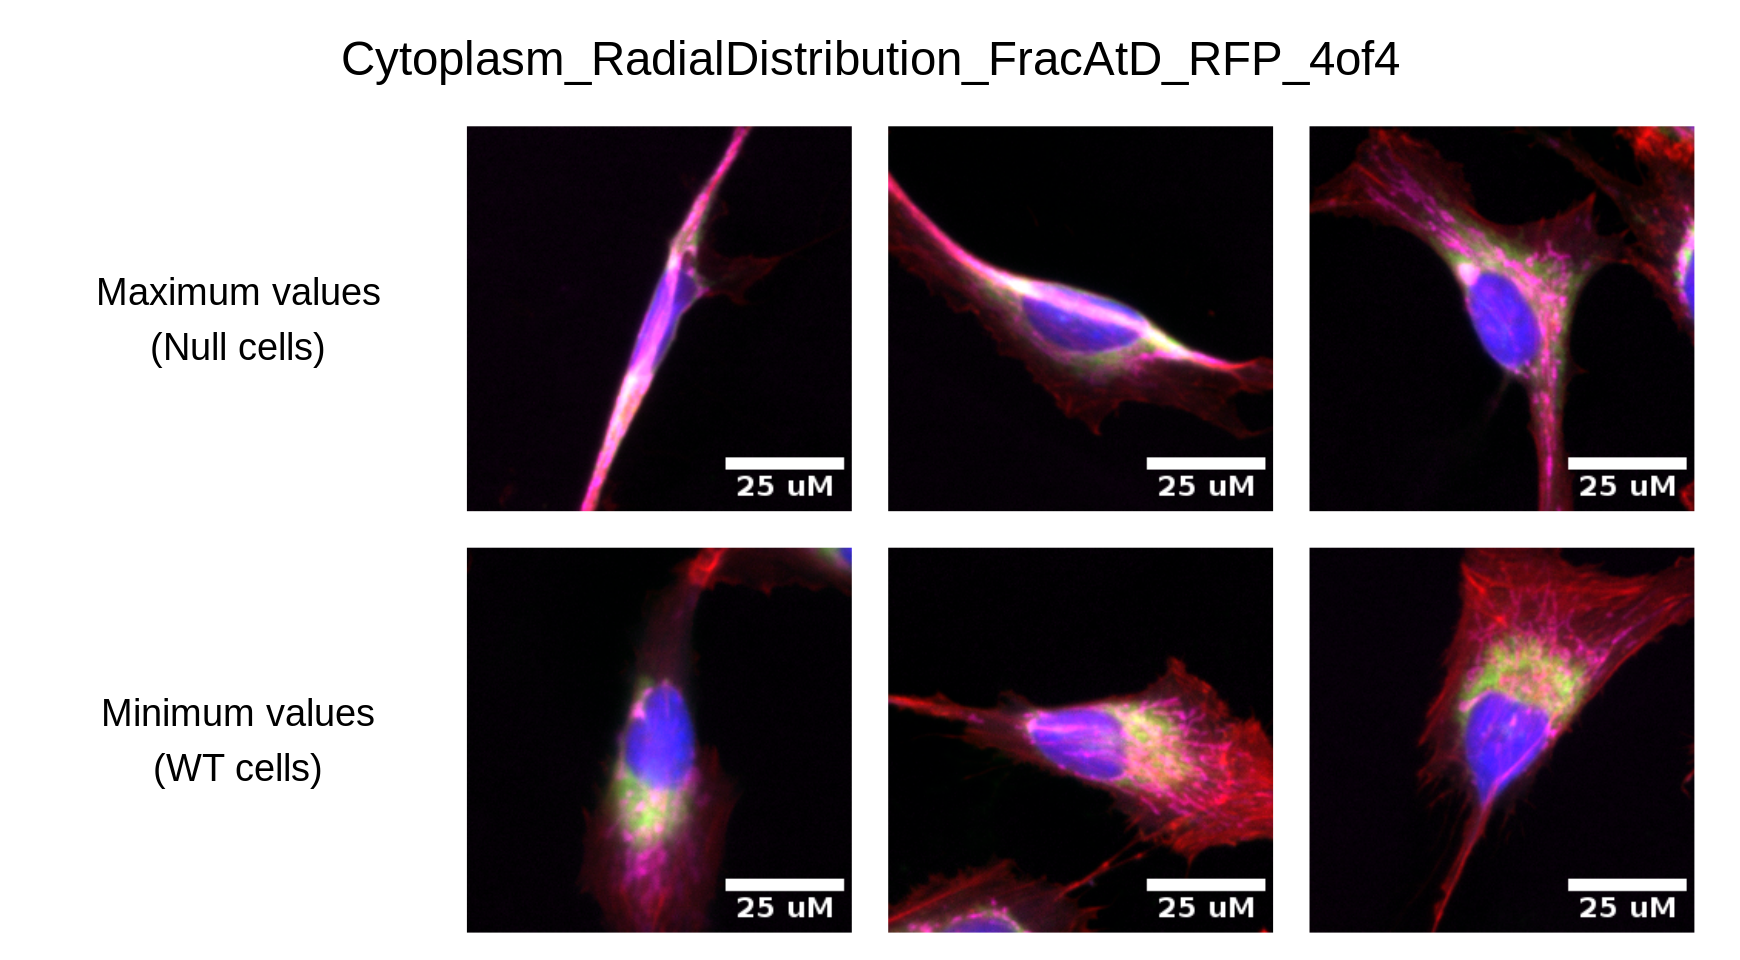

In [8]:
# Create montage
width <- 14.5
height <- 8

options(repr.plot.width = width, repr.plot.height = height)

# patch the images together
radial_feat_plot <- (
    wrap_elements(full = radial_patch_text)
    + wrap_elements(max_radial_feat_images)
    + wrap_elements(min_radial_feat_images)
    + plot_layout(ncol = 1, heights = c(0.2, 1, 1))
    )

radial_feat_plot

# save plot
ggsave(
    file.path(
        paste0(
            "./","radial_feature_montage.png"
        )
    ),
    radial_feat_plot, width = width, height = height, dpi = 600
)

## Generate top intensity feature image montage

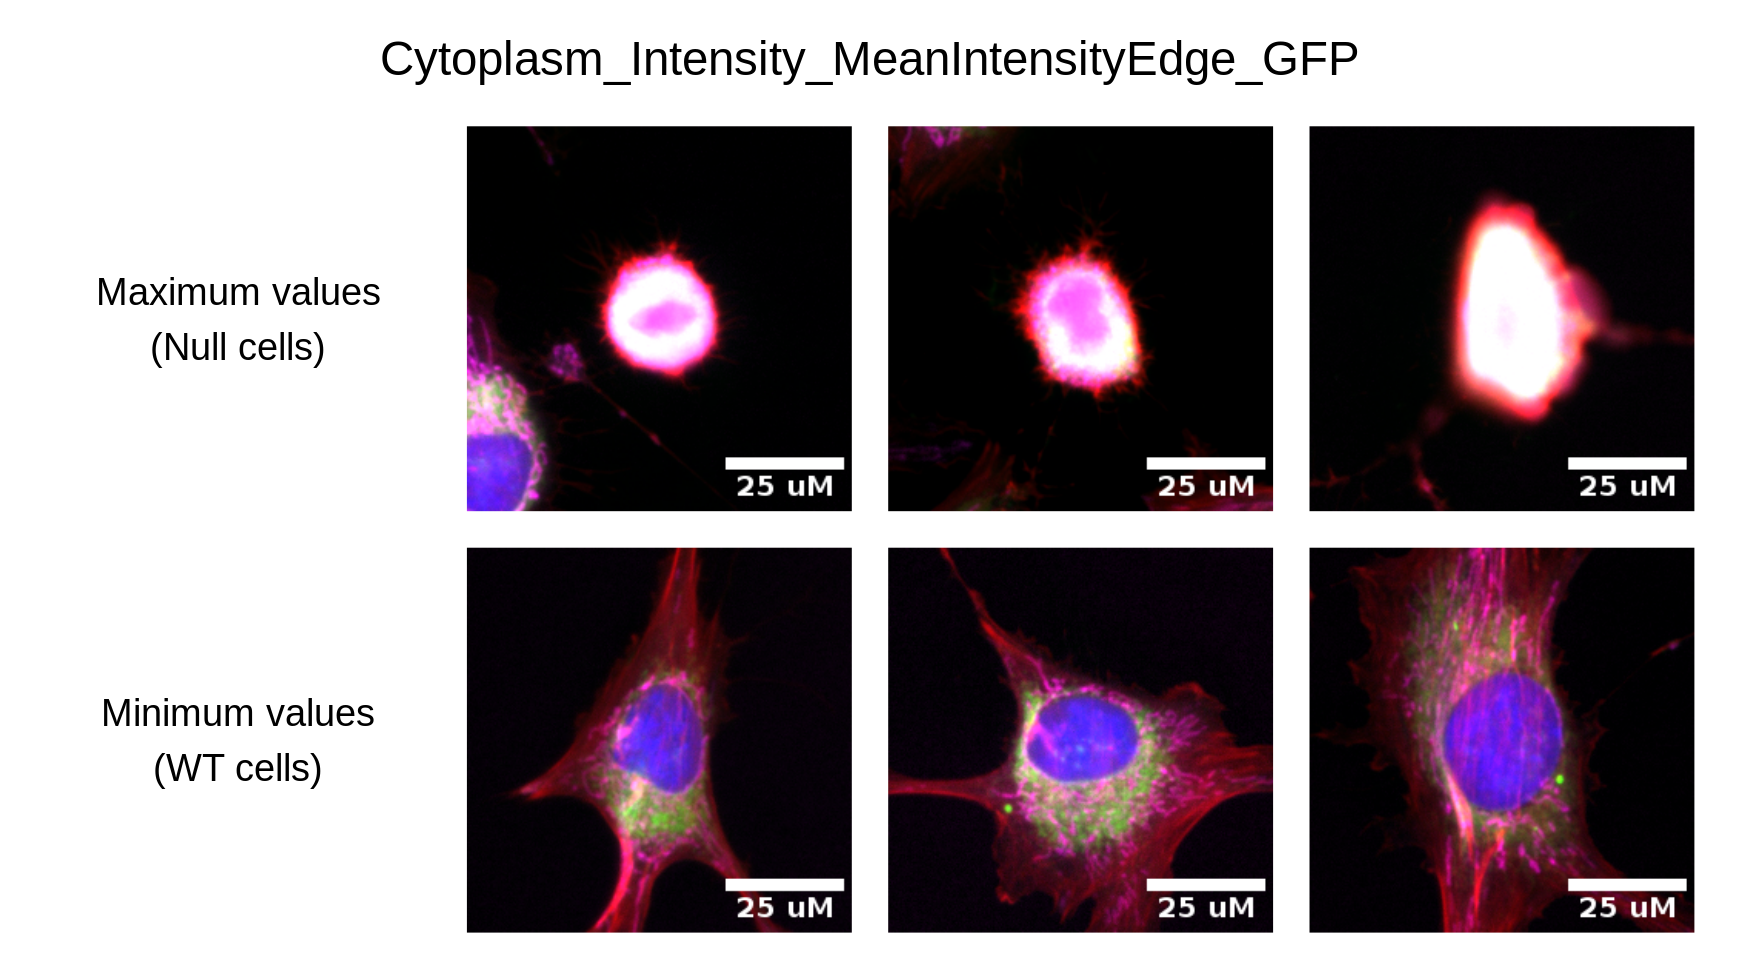

In [9]:
# Create montage
width <- 14.5
height <- 8

options(repr.plot.width = width, repr.plot.height = height)

# patch the images together
int_feat_plot <- (
    wrap_elements(full = int_patch_text)
    + wrap_elements(max_int_feat_images)
    + wrap_elements(min_int_feat_images)
    + plot_layout(ncol = 1, heights = c(0.2, 1, 1))
    )

int_feat_plot

# save plot
ggsave(
    file.path(
        paste0(
            "./","intensity_feature_montage.png"
        )
    ),
    int_feat_plot, width = width, height = height, dpi = 600
)